In [1]:
import fiftyone as fo
import fiftyone.brain as fob

import fiftyone.zoo as foz
from fiftyone import ViewField as F

import cv2
import numpy as np

In [2]:
fo.__version__

'0.22.3'

## Algumas das principais funções
https://docs.voxel51.com/tutorials/pandas_comparison.html

### Fiftyone Zoo

Dataset disponíveis dentro do Fiftyone - https://docs.voxel51.com/user_guide/dataset_zoo/datasets.html

Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 200/200 [1.8s elapsed, 0s remaining, 111.0 samples/s]         
Dataset 'quickstart' created



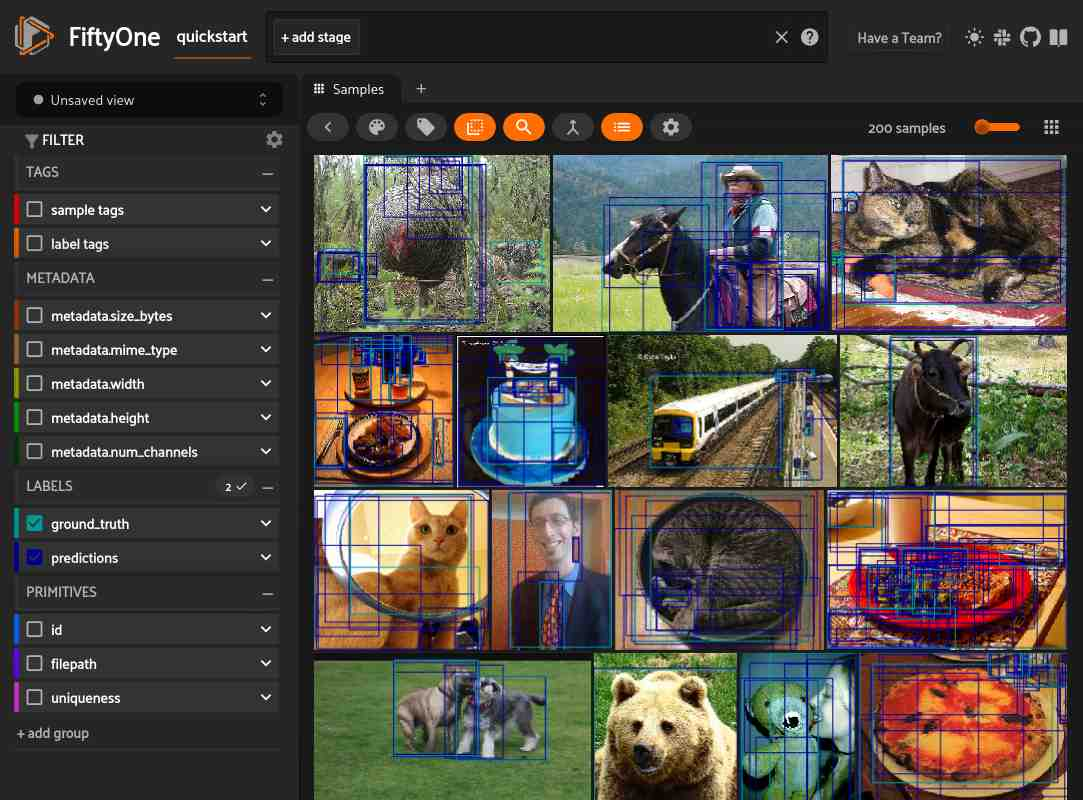

In [3]:
dataset = foz.load_zoo_dataset('quickstart')
session = fo.launch_app(dataset)

Modelos treinados disponíveis dentro do Fiftyone - https://docs.voxel51.com/user_guide/model_zoo/models.html

In [ ]:
#model = foz.load_zoo_model('faster-rcnn-resnet50-coco-tf')
#dataset.apply_model(model, 'predictions')

### Dataset customizado
Pare realizar os testes foi baixado local o dataset [Traffic Detection Project](https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project) disponível no Kaggle com anotações no formato do YOLO para detecção de objetos e carregado para dentro do Fiftyone.

Mais informações de importação de dados: https://docs.voxel51.com/user_guide/dataset_creation/index.html#

Mais informações dos tipos de dados aceitos: https://docs.voxel51.com/user_guide/using_datasets.html#media-type

Mais informações dos formatos de anotações aceitos: https://docs.voxel51.com/api/fiftyone.types.dataset_types.html

In [12]:
dataset = fo.Dataset.from_dir(
    name='traffic',
    dataset_dir='Traffic Detection Project/valid',
    dataset_type=fo.types.YOLOv5Dataset,
)

 100% |█████████████████| 549/549 [1.5s elapsed, 0s remaining, 370.8 samples/s]         


In [ ]:
#dataset = fo.load_dataset('traffic')

In [13]:
session = fo.launch_app(dataset, port=5151, auto=False)  # auto == nao abrir no output

Session launched. Run `session.show()` to open the App in a cell output.



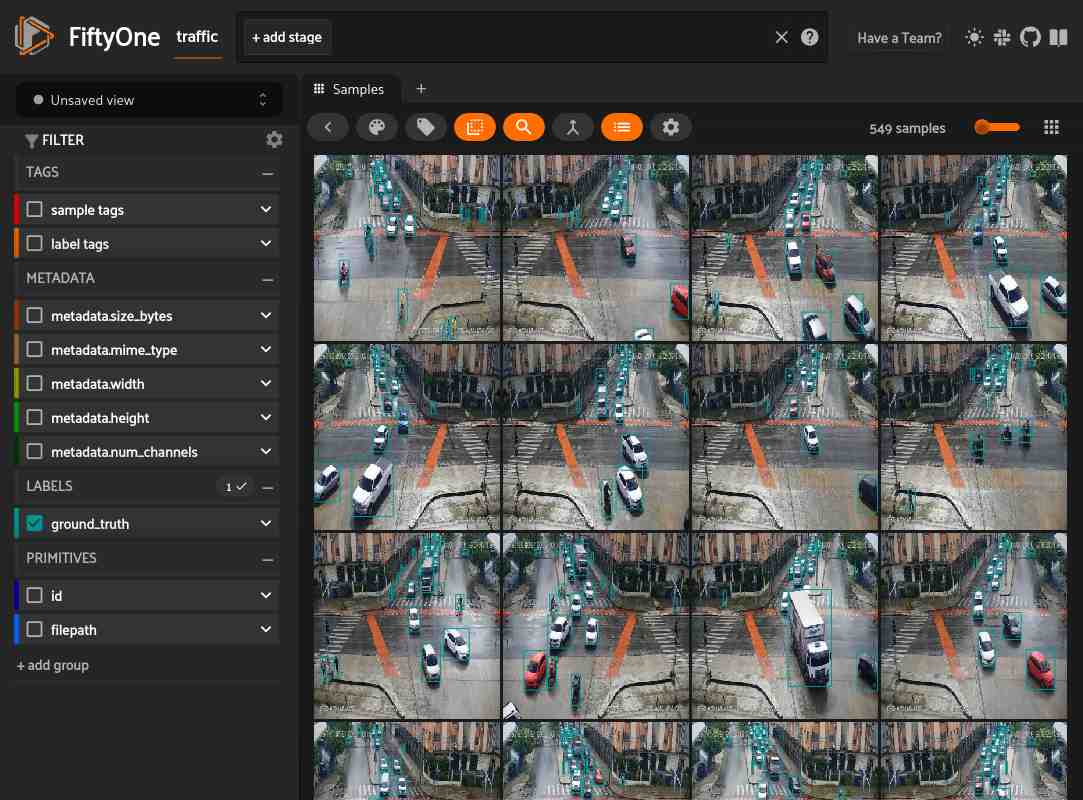

In [14]:
session.show()

In [15]:
session.open_tab()

<IPython.core.display.Javascript object>

In [16]:
#fo.launch_app(dataset, desktop=True).wait()

In [17]:
dataset

Name:        traffic
Media type:  image
Num samples: 549
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [18]:
dataset.compute_metadata()

Computing metadata...
 100% |█████████████████| 549/549 [651.9ms elapsed, 0s remaining, 842.1 samples/s]      



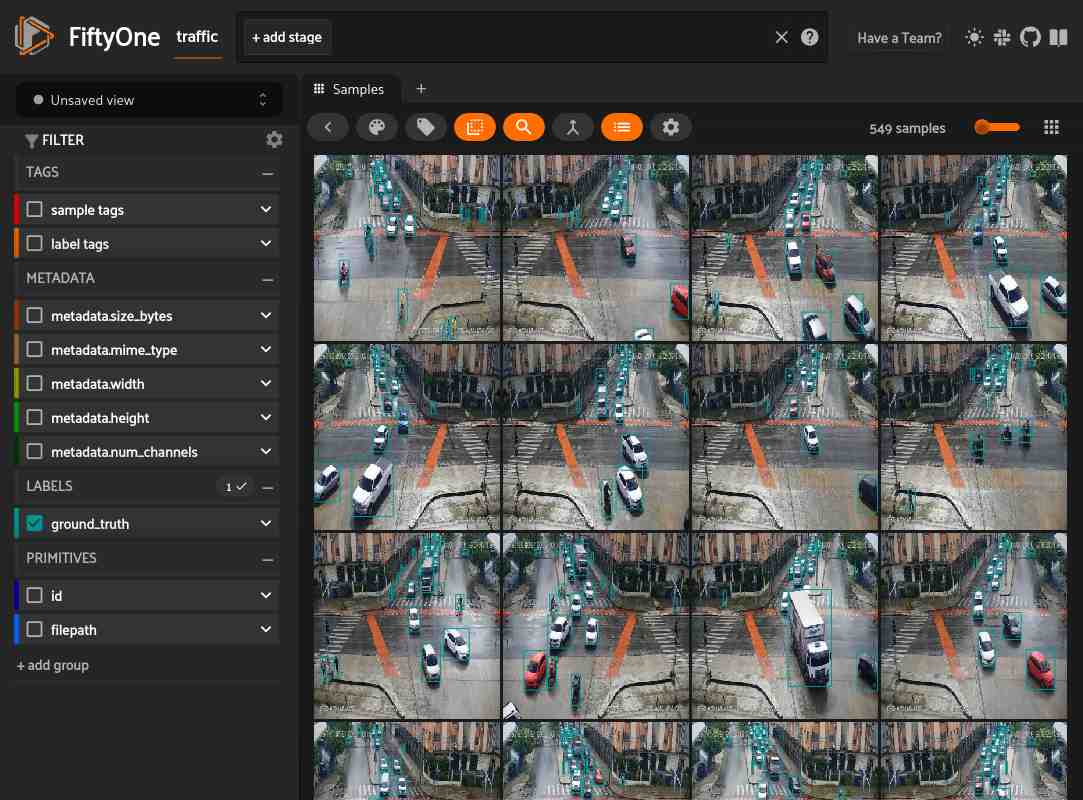

Dataset:          traffic
Media type:       image
Num samples:      549
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [19]:
fo.launch_app(dataset)

In [20]:
dataset

Name:        traffic
Media type:  image
Num samples: 549
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [21]:
dataset.values('filepath')

['/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1085_png_jpg.rf.0608a42a5c9090a4efaf9567f80fa992.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1105_png_jpg.rf.0aa6c5d1769ce60a33d7b51247f2a627.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1255_png_jpg.rf.4a5897742234e20f308c68ce44f7e8d3.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1260_png_jpg.rf.93311043ebe28f443929de926f75b75c.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1260_png_jpg.rf.c124bd539e80fd59df597a835b6dc0a5.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1265_png_jpg.rf.dee78f872c4b0a47912ad16b0d7f001f.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1270_png_jpg.rf.3bce1bedda521fcbf4011abfd1c271a9.jpg',
 '/home/max/Documents/PA/FiftyOne/

In [22]:
new_dataset = dataset.skip(3)
new_dataset

Dataset:     traffic
Media type:  image
Num samples: 546
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Skip(skip=3)

In [23]:
new_dataset.values('filepath')

['/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1260_png_jpg.rf.93311043ebe28f443929de926f75b75c.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1260_png_jpg.rf.c124bd539e80fd59df597a835b6dc0a5.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1265_png_jpg.rf.dee78f872c4b0a47912ad16b0d7f001f.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1270_png_jpg.rf.3bce1bedda521fcbf4011abfd1c271a9.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1275_png_jpg.rf.15a8f5fc8bfdfd5225a40a84aa4d79fe.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1395_png_jpg.rf.0f15d72c91d56b120d6e0520bd55d9ea.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1410_png_jpg.rf.82f4687a8930613ebb5efd948dae1abe.jpg',
 '/home/max/Documents/PA/FiftyOne/

In [24]:
new_dataset = dataset.limit(4)
new_dataset

Dataset:     traffic
Media type:  image
Num samples: 4
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Limit(limit=4)

In [25]:
new_dataset.values('filepath')

['/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1085_png_jpg.rf.0608a42a5c9090a4efaf9567f80fa992.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1105_png_jpg.rf.0aa6c5d1769ce60a33d7b51247f2a627.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1255_png_jpg.rf.4a5897742234e20f308c68ce44f7e8d3.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1260_png_jpg.rf.93311043ebe28f443929de926f75b75c.jpg']

In [26]:
new_dataset = dataset.take(4)  # Can pass "seed"
new_dataset

Dataset:     traffic
Media type:  image
Num samples: 4
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Take(size=4, seed=None)

In [27]:
new_dataset.values('filepath')

['/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/ant_sales-1940_png_jpg.rf.d04fe240712f1120d8fd6055c31a4a77.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/image05_png_jpg.rf.4894336a40bf3cc7d280a2fdf29d52dc.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-2130_png_jpg.rf.a2c91cd570376110dc5e8d7c0e71b70f.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/ant_sales-11025_png_jpg.rf.69db1589aef86fe609e17902e6dfa6cb.jpg']

In [28]:
new_dataset = dataset.shuffle()  # Can pass "seed"
new_dataset

Dataset:     traffic
Media type:  image
Num samples: 549
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Shuffle(seed=None)

In [29]:
new_dataset.values('filepath')

['/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/screenshot_10434_jpg.rf.b3dcb96440f81d15774a53adf0925939.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/aguanambi-1255_png_jpg.rf.4a5897742234e20f308c68ce44f7e8d3.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/duque_de_caxias-1575_png_jpg.rf.00b72e1993a802b9b1dde646c4aba495.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/duque_de_caxias-1285_png_jpg.rf.d54d7651eb92683e0b7953b305669a06.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/duque_de_caxias-130_png_jpg.rf.8f6cabced75658f2f24f2edba355676d.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/image16_png_jpg.rf.e13ddc48497f50a45eb10c9327341b1b.jpg',
 '/home/max/Documents/PA/FiftyOne/Traffic Detection Project/valid/images/duque_de_caxias-2140_png_jpg.rf.e14e5d5f37a5e19f2aaf97390890d6cf.jpg',
 '/home/max/Document

### Fiftyone Brain
https://docs.voxel51.com/user_guide/brain.html

In [30]:
fob.compute_similarity(
    dataset,
    model='clip-vit-base32-torch',  #umap
    brain_key='img_sim',
)

Computing embeddings...
 100% |█████████████████| 549/549 [21.2s elapsed, 0s remaining, 23.4 samples/s]      



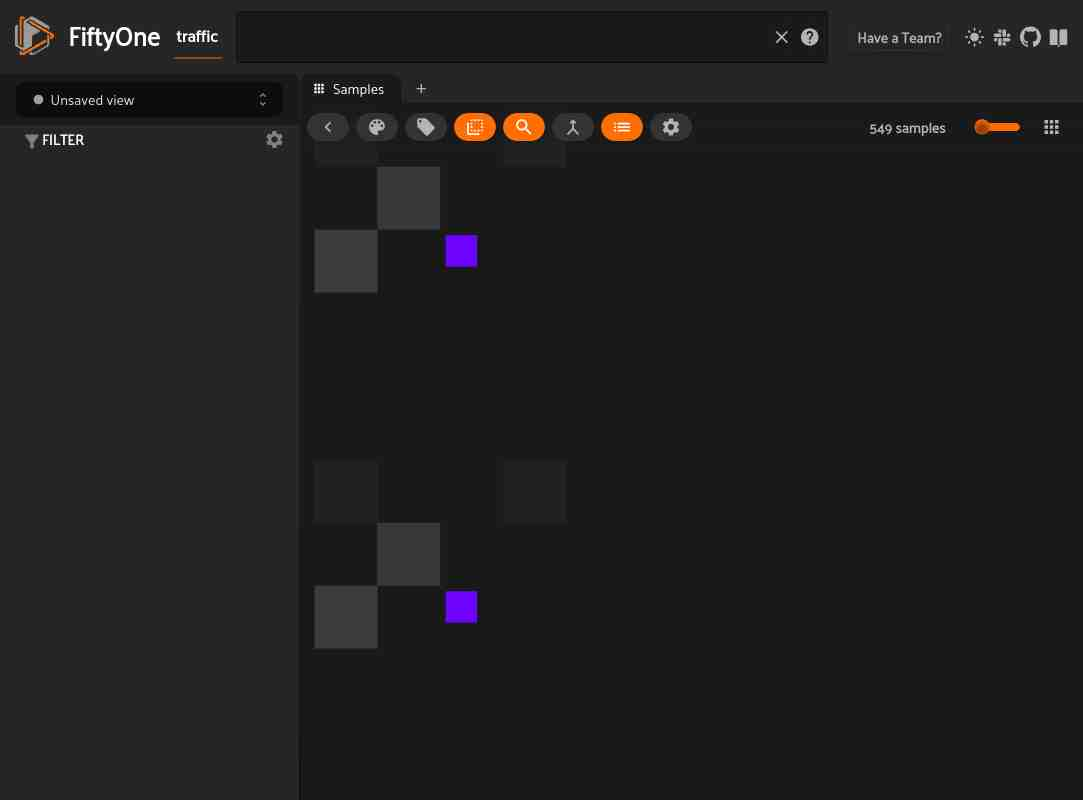

Dataset:          traffic
Media type:       image
Num samples:      549
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [31]:
fo.launch_app(dataset)

In [32]:
fob.compute_uniqueness(dataset)

Computing embeddings...
 100% |█████████████████| 549/549 [1.7s elapsed, 0s remaining, 479.4 samples/s]      
Computing uniqueness...
Uniqueness computation complete



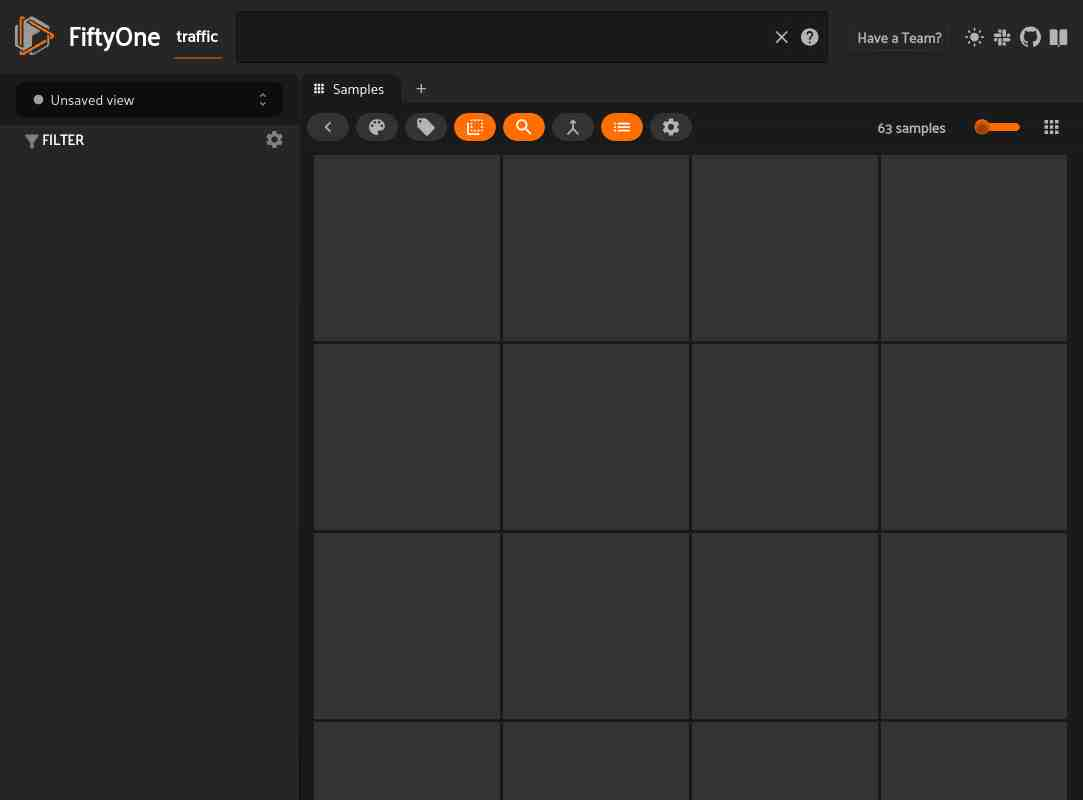

Dataset:          traffic
Media type:       image
Num samples:      549
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [33]:
fo.launch_app(dataset)

### Filtros
Documentação: https://docs.voxel51.com/api/fiftyone.core.expressions.html#fiftyone.core.expressions.ViewExpression

In [34]:
dataset

Name:        traffic
Media type:  image
Num samples: 549
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField

In [35]:
new_dataset = dataset.match(F('uniqueness') < 0.3)
new_dataset

Dataset:     traffic
Media type:  image
Num samples: 267
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
View stages:
    1. Match(filter={'$expr': {'$lt': [...]}})


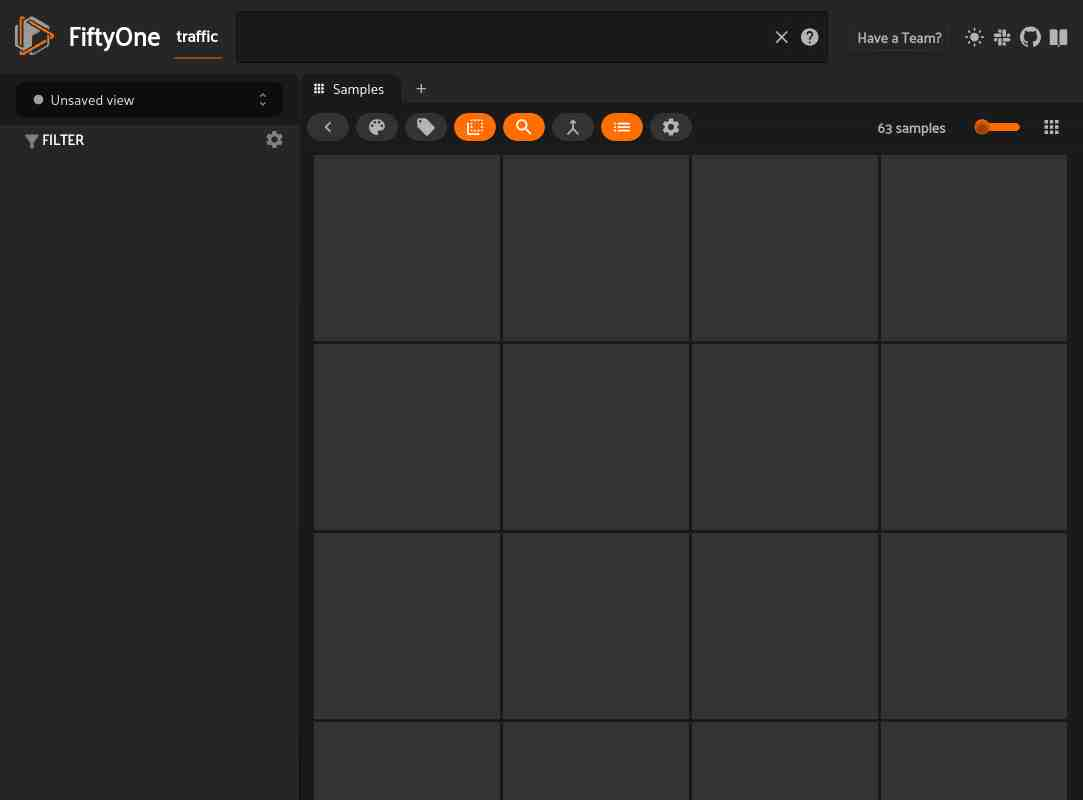

Dataset:          traffic
Media type:       image
Num samples:      267
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. Match(filter={'$expr': {'$lt': [...]}})

In [36]:
fo.launch_app(new_dataset)


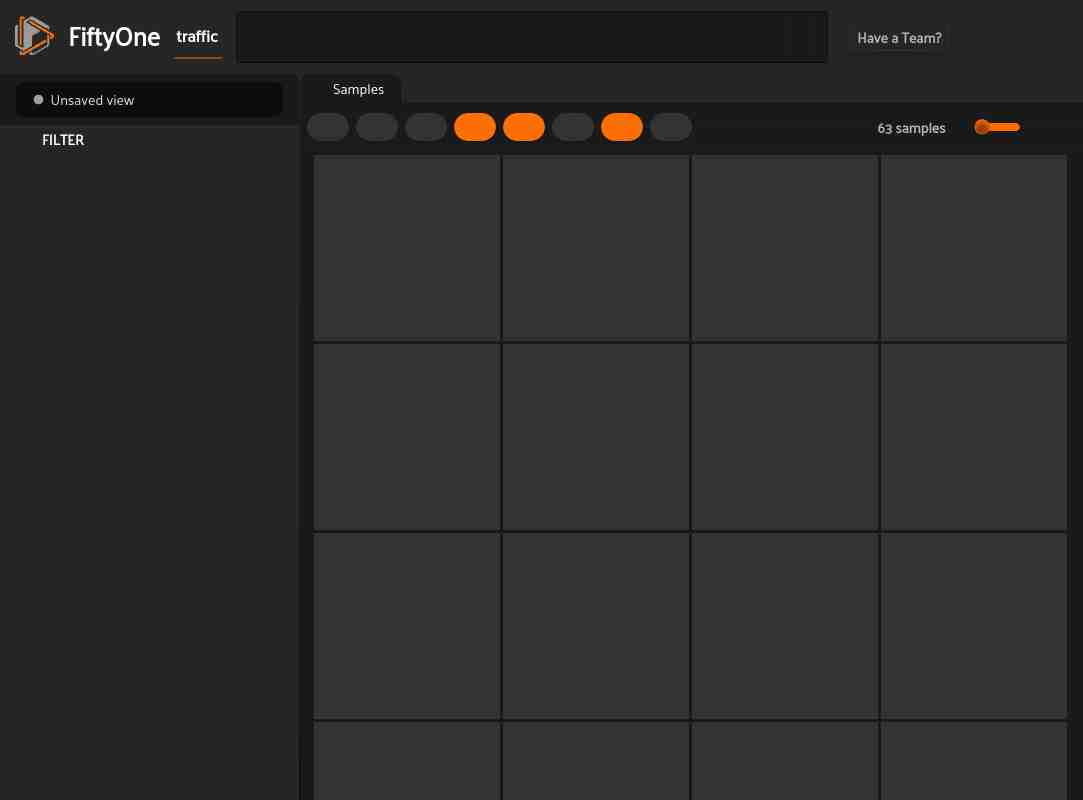

Dataset:          traffic
Media type:       image
Num samples:      8
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})

In [37]:
fo.launch_app(dataset.match(F('ground_truth.detections').length() == 0))


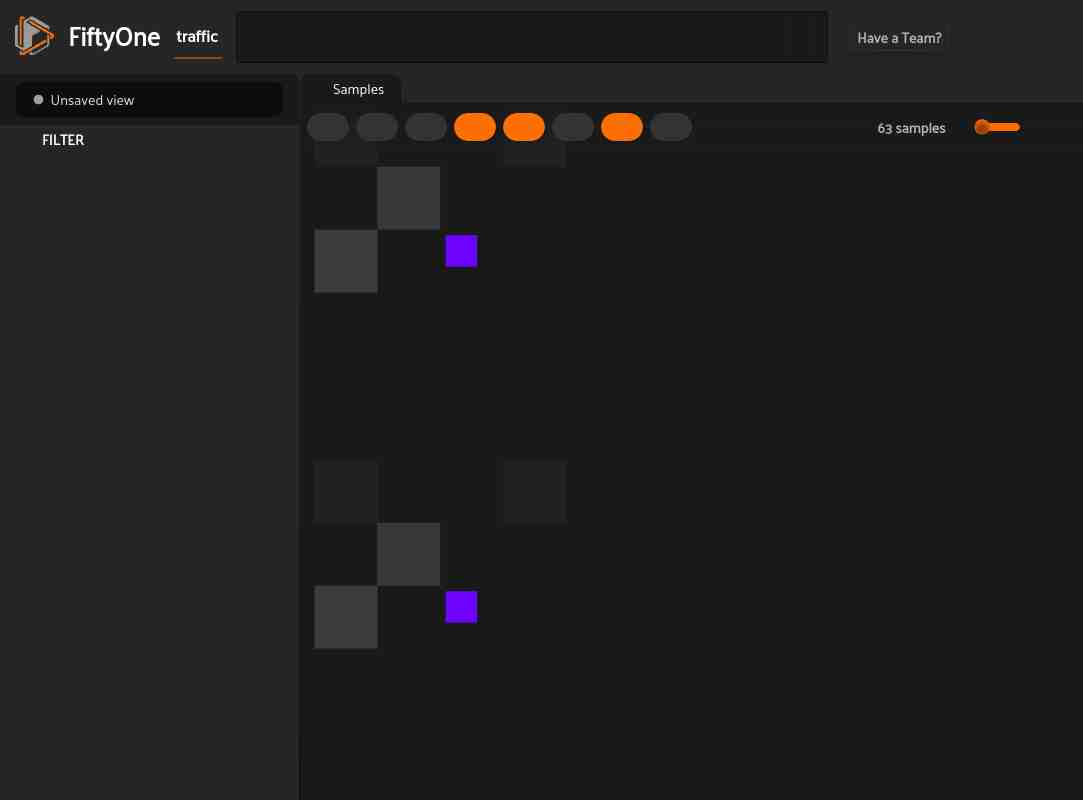

Dataset:          traffic
Media type:       image
Num samples:      549
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. SortBy(field_or_expr='uniqueness', reverse=False, create_index=True)

In [38]:
fo.launch_app(dataset.sort_by(F('uniqueness'), reverse=False))


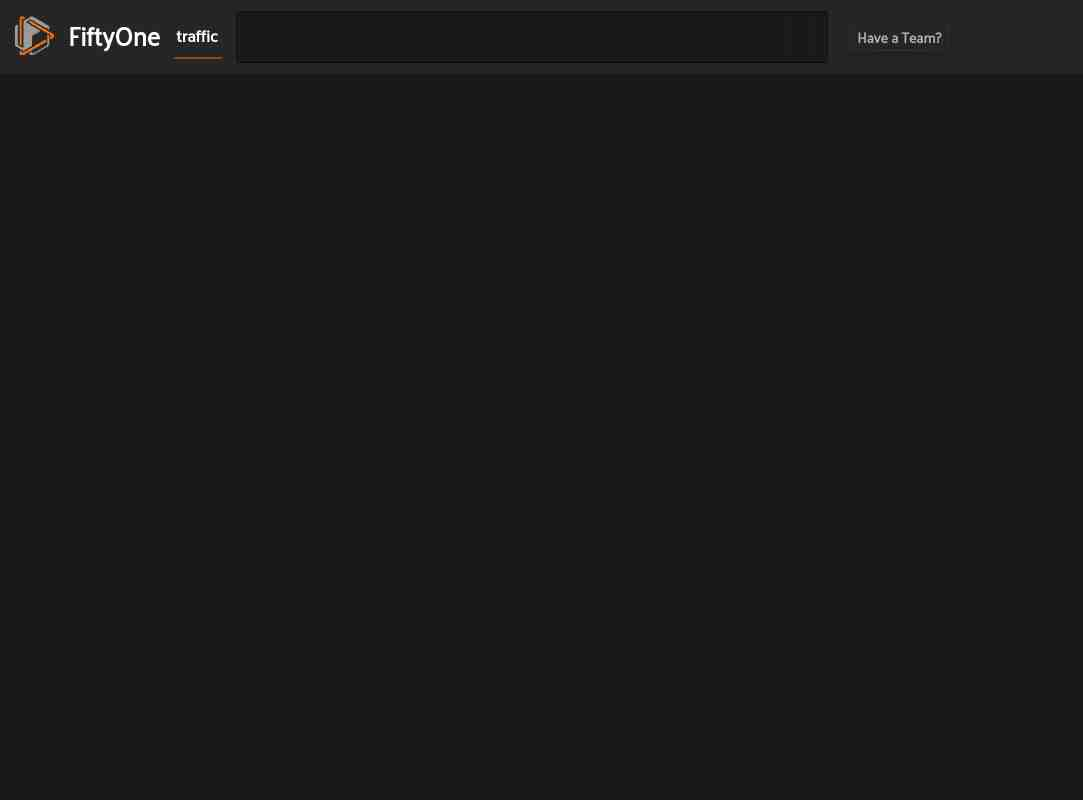

Dataset:     -
Session URL: http://localhost:5151/

In [39]:
uniq1 = F('uniqueness') > 0.7
uniq2 = F('uniqueness') < 0.77
fo.launch_app(dataset.match(uniq1 & uniq2))  # and == &; OR == |
#dataset.match(F.all([uniq1, uniq2]))  # All AND
#dataset.match(F.any([uniq1, uniq2]))  # All OR
#dataset.match(~F.all([uniq1, uniq2]))  # ~ == Not


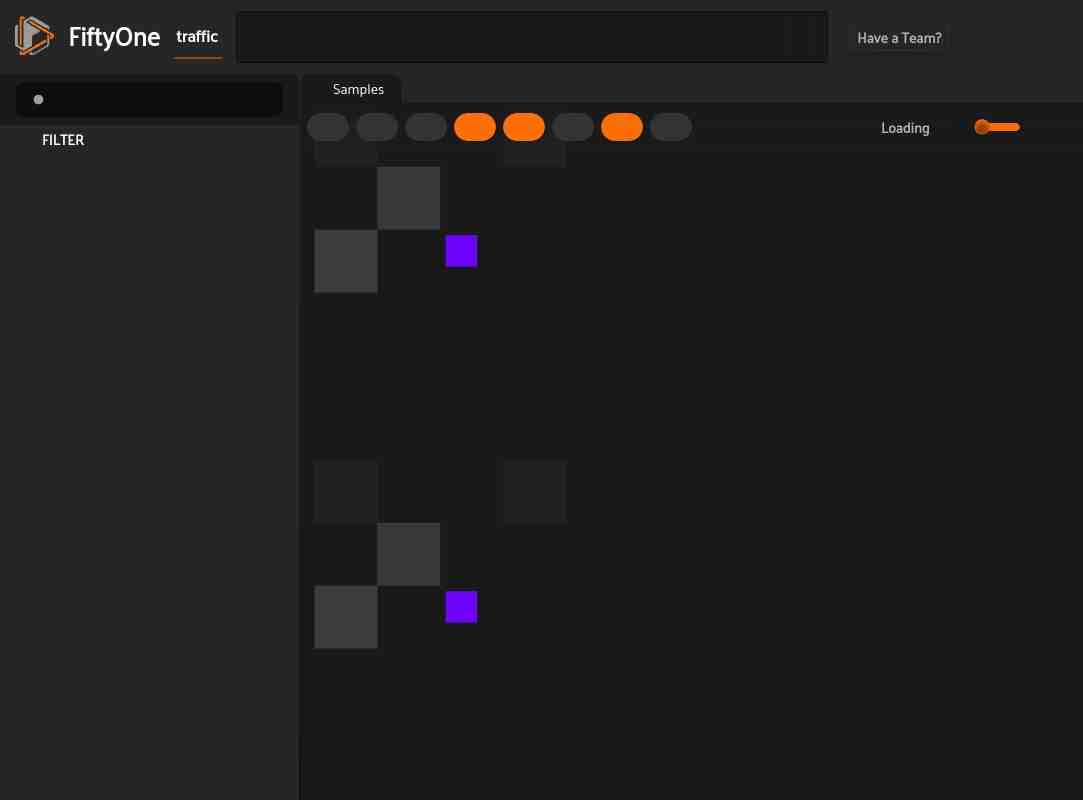

Dataset:          traffic
Media type:       image
Num samples:      63
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. Match(filter={'$expr': {'$setIsSubset': [...]}})

In [40]:
fo.launch_app(dataset.match(F('ground_truth.detections.label').contains(['bus', 'motorbike'], all=True)))  # all == contains all

Mais informações do View: https://docs.voxel51.com/recipes/creating_views.html

In [41]:
dataset.list_view_stages()

['concat',
 'exclude',
 'exclude_by',
 'exclude_fields',
 'exclude_frames',
 'exclude_groups',
 'exclude_labels',
 'exists',
 'filter_field',
 'filter_labels',
 'filter_keypoints',
 'flatten',
 'geo_near',
 'geo_within',
 'group_by',
 'limit',
 'limit_labels',
 'map_labels',
 'set_field',
 'match',
 'match_frames',
 'match_labels',
 'match_tags',
 'mongo',
 'select',
 'select_by',
 'select_fields',
 'select_frames',
 'select_groups',
 'select_group_slices',
 'select_labels',
 'shuffle',
 'skip',
 'sort_by',
 'sort_by_similarity',
 'take',
 'to_patches',
 'to_evaluation_patches',
 'to_clips',
 'to_trajectories',
 'to_frames']

### Operações

In [42]:
dataset.count('ground_truth.detections')

6270

In [43]:
dataset.sum('uniqueness')

179.9727481545242

In [44]:
dataset.mean('uniqueness')

0.32781921339621894

In [45]:
dataset.std('uniqueness')

0.1527465341894551

In [47]:
dataset.bounds('uniqueness')  # Min and max

(0.0789091729659742, 1.0)

In [48]:
percentiles = [0.0, 0.4, 0.6, 0.8, 1.0]
dataset.quantiles('uniqueness', percentiles)

[0.0789091729659742,
 0.2647299879735076,
 0.3465117712342439,
 0.460850917753487,
 1.0]

In [49]:
dataset.distinct('ground_truth.detections.label')

['bicycle', 'bus', 'car', 'motorbike', 'person']

In [50]:
dataset.list_aggregations()

['bounds',
 'count',
 'count_values',
 'distinct',
 'histogram_values',
 'mean',
 'quantiles',
 'schema',
 'list_schema',
 'std',
 'sum',
 'values']

### Alterar dataset

In [ ]:
dataset_clone = dataset.clone()


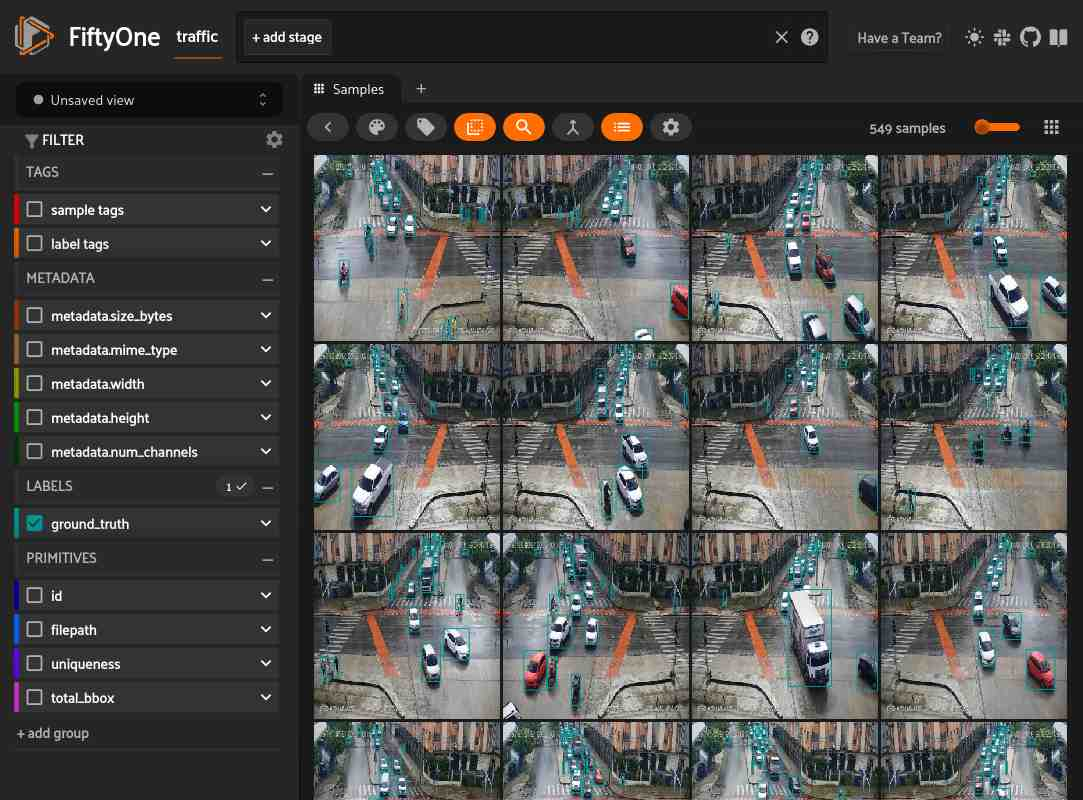

Dataset:          traffic
Media type:       image
Num samples:      549
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [51]:
total_bbox = []
for sample in dataset:
    total_bbox.append(len(sample['ground_truth']['detections']))

dataset.set_values('total_bbox', total_bbox)
fo.launch_app(dataset)

In [52]:
single_sample = dataset.first()
# single_sample = fo.Sample(filepath='/path/to/image.png')

print(f'Before: {len(dataset)}')
dataset.add_sample(single_sample)
print(f'After: {len(dataset)}')

Before: 549
After: 550


In [53]:
samples_to_remove = dataset.take(10)

print(f'Before: {len(dataset)}')
dataset.delete_samples(samples_to_remove)
print(f'After: {len(dataset)}')

Before: 550
After: 540


In [54]:
sample_ids = dataset.take(10).values('id')

# view = dataset.select(sample_ids)

print(len(dataset))
dataset.delete_samples(sample_ids)
print(len(dataset))

540
530



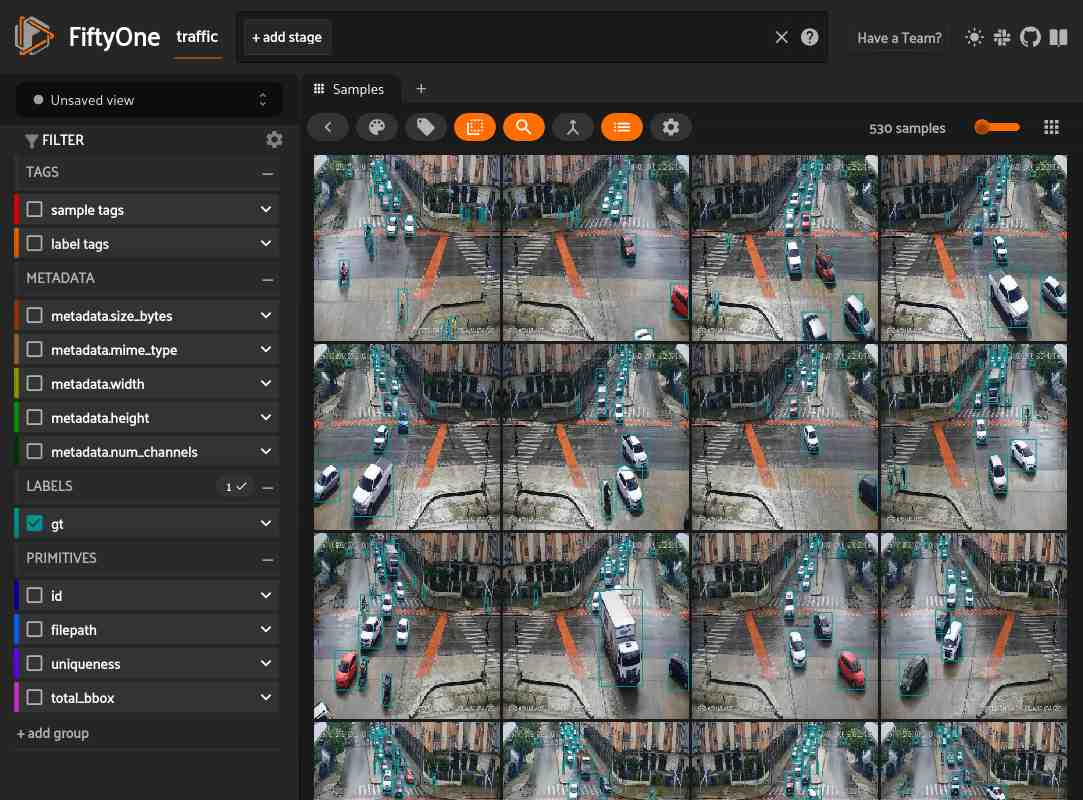

Dataset:          traffic
Media type:       image
Num samples:      530
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [55]:
# dataset.rename_sample_fields({'ground_truth': 'gt', 'uniqueness': 'uniq'})  # fields (with 's')
dataset.rename_sample_field('ground_truth', 'gt')
fo.launch_app(dataset)

## Plots

Mais informações: https://docs.voxel51.com/user_guide/plots.html

In [56]:
dataset_mnist = foz.load_zoo_dataset('mnist', split='test')

Split 'test' already downloaded
Loading 'mnist' split 'test'
 100% |█████████████| 10000/10000 [2.2s elapsed, 0s remaining, 4.8K samples/s]      
Dataset 'mnist-test' created


In [57]:
# Construct a ``num_samples x num_pixels`` array of images
embeddings = np.array([
    cv2.imread(f, cv2.IMREAD_UNCHANGED).ravel()
    for f in dataset_mnist.values('filepath')
])

# Compute 2D representation
results = fob.compute_visualization(
    dataset_mnist,
    embeddings=embeddings,
    num_dims=2,
    method='umap',
    brain_key='mnist_test',
    verbose=True,
    seed=51,
)

Generating visualization...


/home/max/anaconda3/envs/fiftyone/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(random_state=51, verbose=True)
Mon Nov  6 10:14:55 2023 Construct fuzzy simplicial set
Mon Nov  6 10:14:55 2023 Finding Nearest Neighbors
Mon Nov  6 10:14:55 2023 Building RP forest with 10 trees
Mon Nov  6 10:14:57 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Mon Nov  6 10:15:04 2023 Finished Nearest Neighbor Search
Mon Nov  6 10:15:06 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Nov  6 10:15:18 2023 Finished embedding



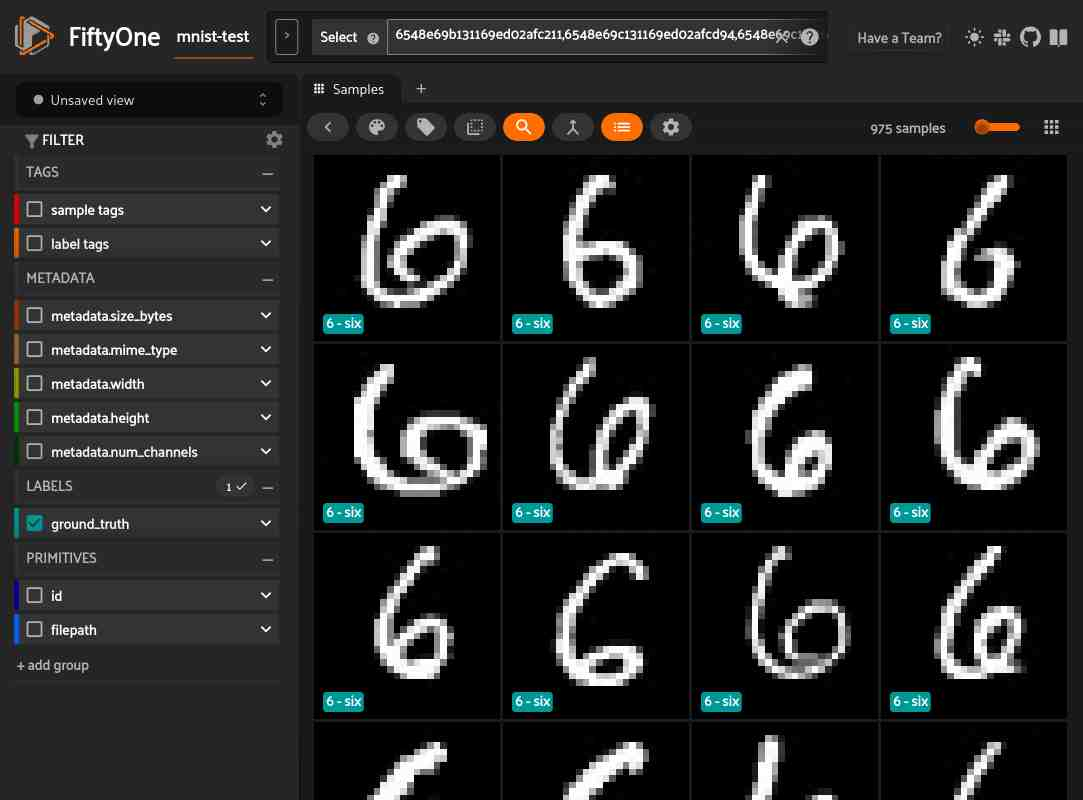

In [58]:
session = fo.launch_app(dataset_mnist)

In [59]:
plot = results.visualize(labels='ground_truth.label')
plot.show()

# Attach plot to session
session.plots.attach(plot)

FigureWidget({
    'data': [{'customdata': array(['6548e69b131169ed02afad2d', '6548e69b131169ed02afad3c',
                                   '6548e69b131169ed02afad3f', ..., '6548e69d131169ed02affb1f',
                                   '6548e69d131169ed02affb32', '6548e69d131169ed02affb3c'], dtype=object),
              'hovertemplate': ('<b>label: %{text}</b><br>x, y ' ... ': %{customdata}<extra></extra>'),
              'line': {'color': '#3366CC'},
              'mode': 'markers',
              'name': '0 - zero',
              'showlegend': True,
              'text': array(['0 - zero', '0 - zero', '0 - zero', ..., '0 - zero', '0 - zero',
                             '0 - zero'], dtype='<U8'),
              'type': 'scattergl',
              'uid': '04a73ad0-bf2d-4a61-b701-2982039d145f',
              'x': array([-0.23613878, -0.9378665 , -0.252364  , ..., -1.2320776 , -1.1849254 ,
                          -1.9415604 ], dtype=float32),
              'y': array([5.176709 , 4.44089

## YOLO

In [60]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

import fiftyone.brain as fob

from ultralytics import YOLO

In [61]:
model = YOLO('yolov8x.pt')

In [62]:
dataset = foz.load_zoo_dataset(
    'coco-2017',
    split='validation',
)

Found annotations at '/home/max/fiftyone/coco-2017/raw/instances_val2017.json'
Images already downloaded
Existing download of split 'validation' is sufficient
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [13.6s elapsed, 0s remaining, 411.4 samples/s]      
Dataset 'coco-2017-validation' created


In [63]:
dataset.default_classes

['0',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 '12',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 '26',
 'backpack',
 'umbrella',
 '29',
 '30',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 '45',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 '66',
 'dining table',
 '68',
 '69',
 'toilet',
 '71',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 '83',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier'

In [64]:
default_classes = []
for cls in dataset.default_classes:
    try:
        int(cls)
    except Exception:
        default_classes.append(cls)

In [65]:
default_classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

Labels aceitos: https://docs.voxel51.com/user_guide/basics.html#labels

In [66]:
# default_classes = dataset.default_classes

# YOLOv8 format: https://github.com/voxel51/fiftyone/pull/3451
import fiftyone.utils.ultralytics as fou

for sample in dataset.iter_samples(progress=True):
    result = model(sample['filepath'], verbose=False)

    sample['YOLOv8'] = fou.to_detections(result[0])
    sample.save()
        
    #break

 100% |███████████████| 5000/5000 [27.1m elapsed, 0s remaining, 3.0 samples/s]      


In [67]:
dataset

Name:        coco-2017-validation
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    YOLOv8:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


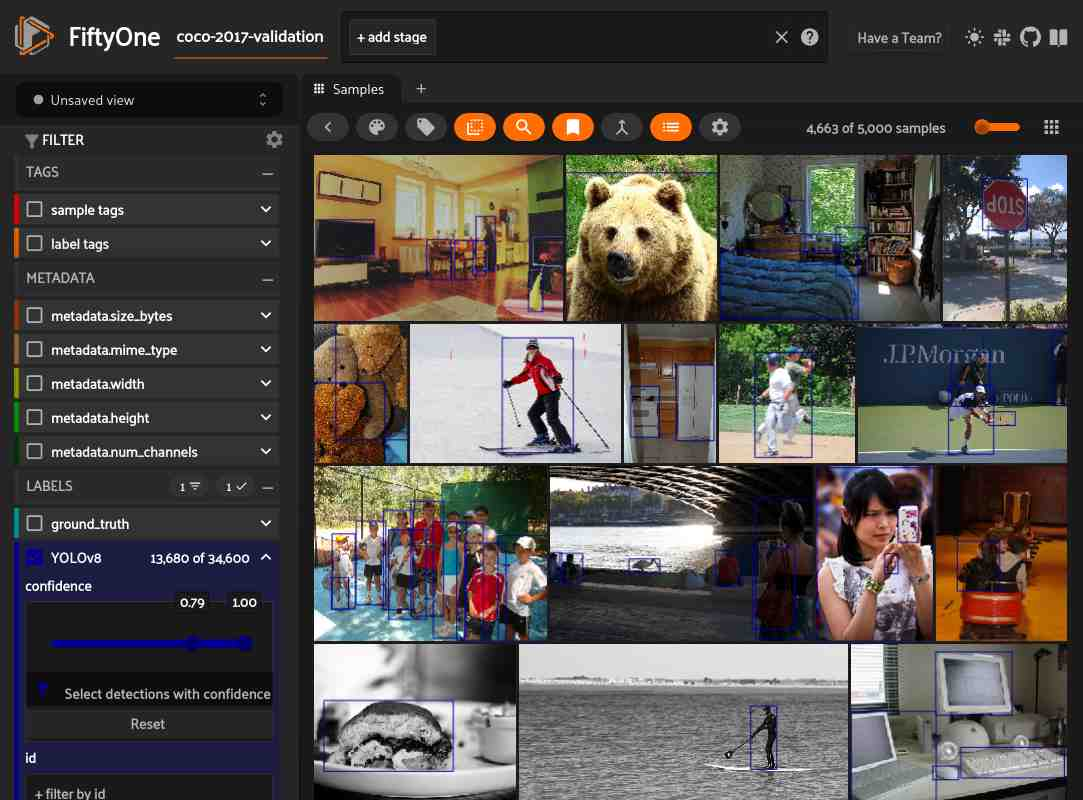

Dataset:          coco-2017-validation
Media type:       image
Num samples:      5000
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [68]:
fo.launch_app(dataset)

Mais informações de avaliação do modelo: https://docs.voxel51.com/user_guide/evaluation.html

In [69]:
# Create TP, FP and FN fields
results = dataset.evaluate_detections(
    pred_field='YOLOv8',
    gt_field='ground_truth',
    eval_key='eval',  # Key to save result (if ommit, not save)
    compute_mAP=True,
    use_boxes=True
)

Evaluating detections...
 100% |███████████████| 5000/5000 [41.8s elapsed, 0s remaining, 115.1 samples/s]      
Performing IoU sweep...
 100% |███████████████| 5000/5000 [31.6s elapsed, 0s remaining, 151.7 samples/s]      



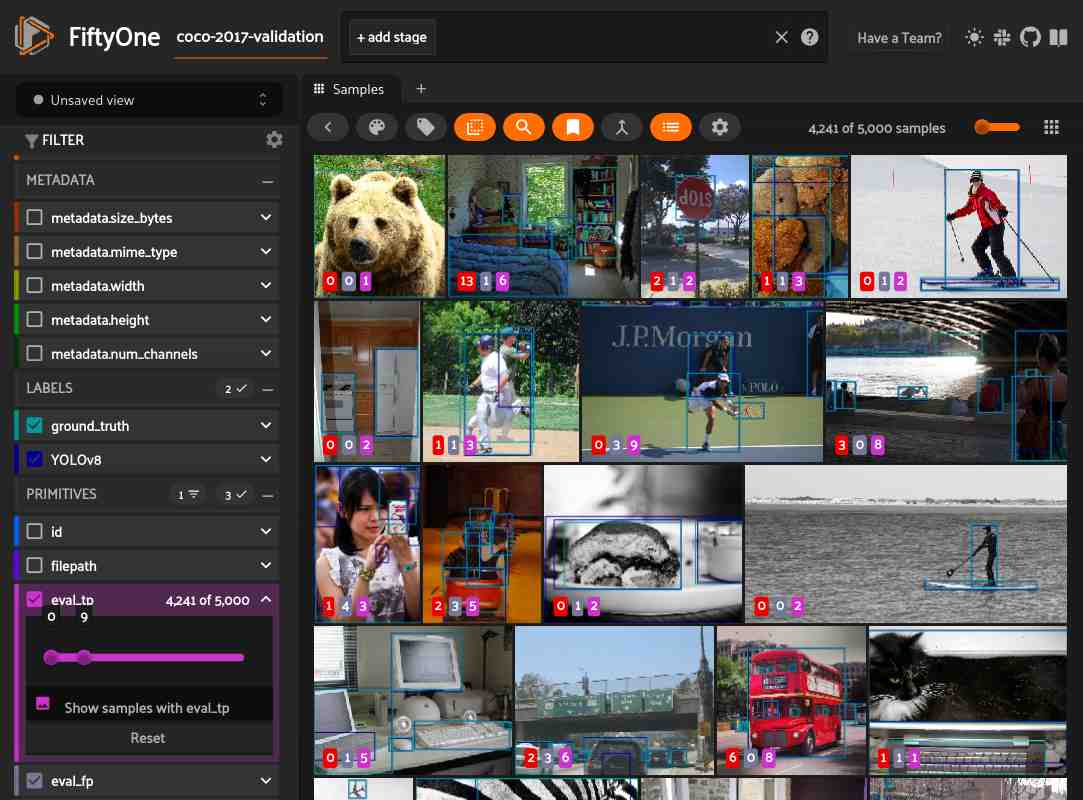

Dataset:          coco-2017-validation
Media type:       image
Num samples:      5000
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [70]:
fo.launch_app(dataset)

In [71]:
dataset.first().YOLOv8.detections[0]

<Detection: {
    'id': '6548e954131169ed02b09e7e',
    'attributes': {},
    'tags': [],
    'label': 'tv',
    'bounding_box': [
        0.008479304611682892,
        0.3906022384762764,
        0.23317642509937286,
        0.22574017941951752,
    ],
    'mask': None,
    'confidence': 0.9300491213798523,
    'index': None,
    'eval': 'tp',
    'eval_id': '6548e8f3131169ed02affb4a',
    'eval_iou': 0.9637858754517663,
}>

In [72]:
results.print_report()

                precision    recall  f1-score   support

      airplane       0.81      0.91      0.86       143
         apple       0.62      0.39      0.48       251
      backpack       0.54      0.42      0.47       371
        banana       0.66      0.45      0.54       407
  baseball bat       0.70      0.70      0.70       149
baseball glove       0.70      0.68      0.69       148
          bear       0.85      0.93      0.89        71
           bed       0.70      0.70      0.70       163
         bench       0.57      0.49      0.52       413
       bicycle       0.68      0.62      0.65       317
          bird       0.84      0.59      0.70       481
          boat       0.69      0.58      0.63       435
          book       0.59      0.25      0.35      1188
        bottle       0.72      0.62      0.67      1060
          bowl       0.63      0.64      0.63       636
      broccoli       0.58      0.43      0.49       318
           bus       0.87      0.81      0.84  

In [73]:
results.metrics()

{'accuracy': 0.5618572227720642,
 'precision': 0.7547398843930636,
 'recall': 0.6873552326805643,
 'fscore': 0.7194732201895526,
 'support': 37992}

In [74]:
results.mAP()

0.4804019009452909


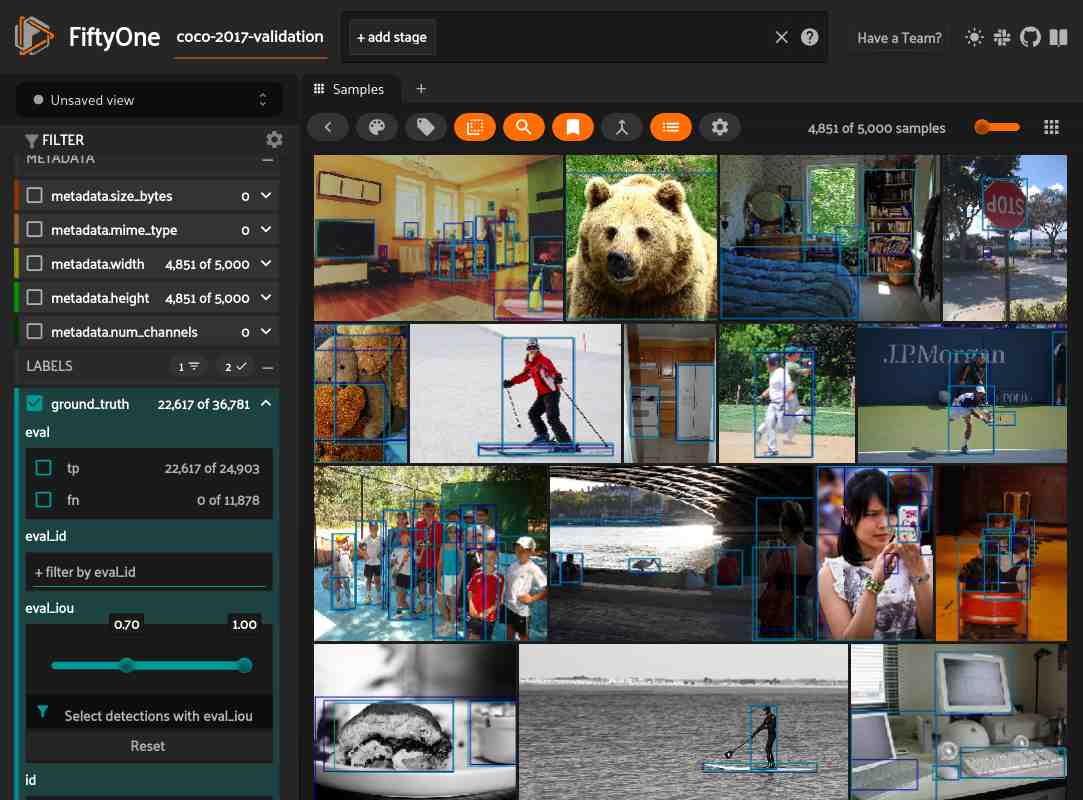

Dataset:          coco-2017-validation
Media type:       image
Num samples:      5000
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. SortBy(field_or_expr='eval_fp', reverse=True, create_index=True)

In [75]:
fo.launch_app(dataset.sort_by('eval_fp', reverse=True))

In [76]:
results = dataset.evaluate_detections(
    pred_field='YOLOv8',
    gt_field='ground_truth',
)

Evaluating detections...
 100% |███████████████| 5000/5000 [22.4s elapsed, 0s remaining, 229.5 samples/s]      
Evaluating detections...
 100% |███████████████| 5000/5000 [22.6s elapsed, 0s remaining, 240.8 samples/s]      


In [77]:
counts = dataset.count_values('ground_truth.detections.label')

In [78]:
classes = sorted(counts, key=counts.get, reverse=True)[1:11]  # Ignoring first (person) because it is an outlier
plot = results.plot_confusion_matrix(classes=classes)
plot.show(height=600)
session.plots.attach(plot)

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': 'e797c1fe-e85b-43b1-a580-8ea1608abea0',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
                           7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
                           3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
                          10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
                           2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
                           9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
                           1,  1,  1,  1,  2,  2,  2,  2,  2, 

## Detecção de erros

Mais informações de detecção de erros:

- https://docs.voxel51.com/tutorials/classification_mistakes.html
- https://docs.voxel51.com/tutorials/detection_mistakes.html

In [79]:
fob.compute_mistakenness(dataset, 'YOLOv8', label_field='ground_truth')

Evaluating detections...
 100% |███████████████| 5000/5000 [58.8s elapsed, 0s remaining, 84.0 samples/s]       
Computing mistakenness...
 100% |███████████████| 5000/5000 [36.8s elapsed, 0s remaining, 153.7 samples/s]      
Mistakenness computation complete



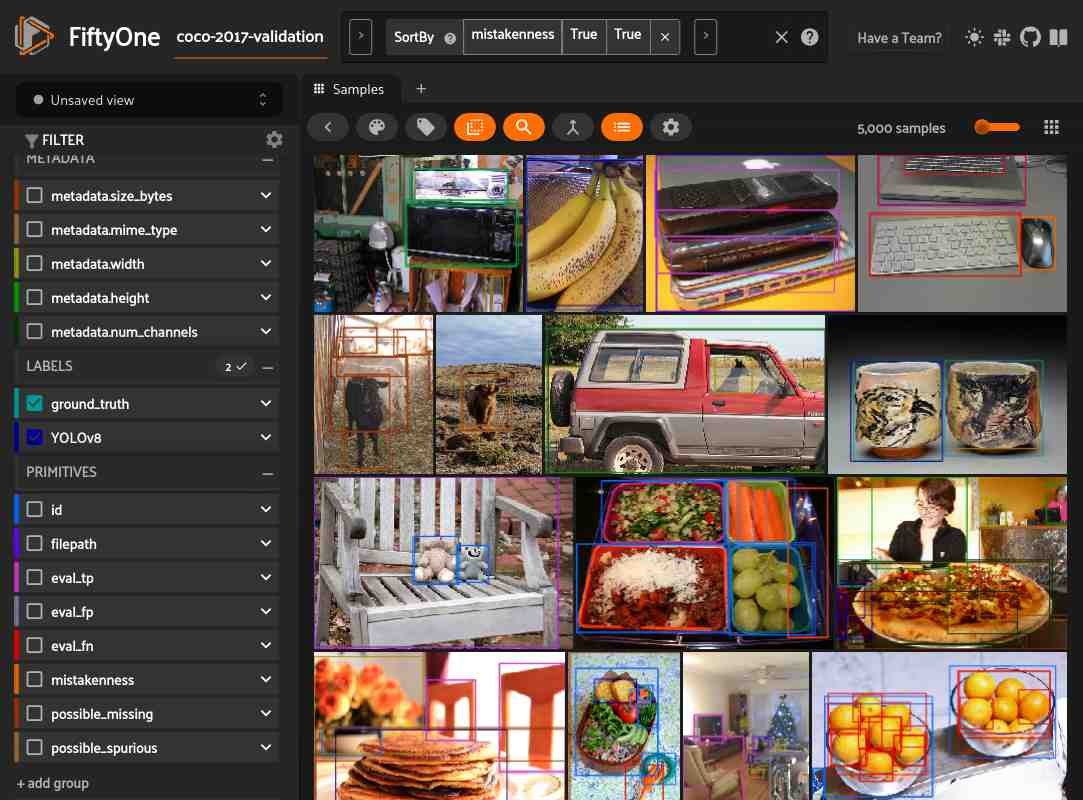

Dataset:          coco-2017-validation
Media type:       image
Num samples:      5000
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. SortBy(field_or_expr='mistakenness', reverse=True, create_index=True)

In [80]:
fo.launch_app(dataset.sort_by('mistakenness', reverse=True))


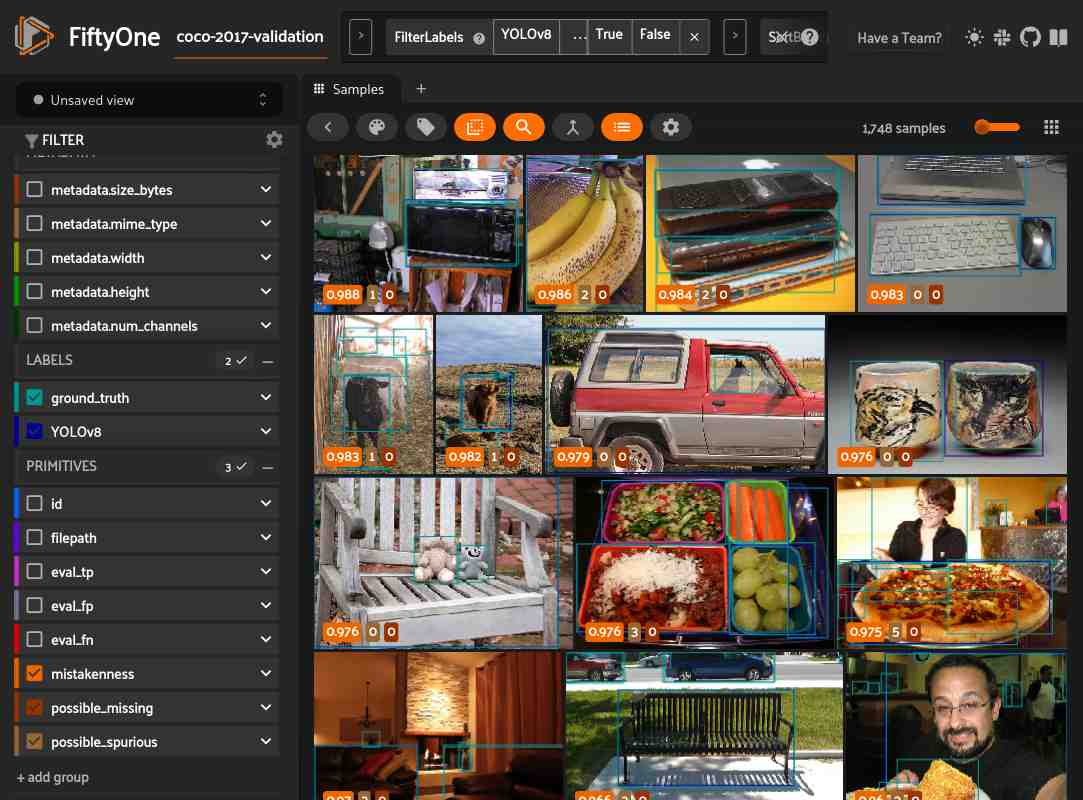

Dataset:          coco-2017-validation
Media type:       image
Num samples:      1748
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. FilterLabels(field='YOLOv8', filter={'$gt': ['$$this.confidence', 0.95]}, only_matches=True, trajectories=False)
    2. SortBy(field_or_expr='mistakenness', reverse=True, create_index=True)

In [81]:
fo.launch_app(dataset.filter_labels('YOLOv8', F('confidence') > 0.95).sort_by('mistakenness', reverse=True))


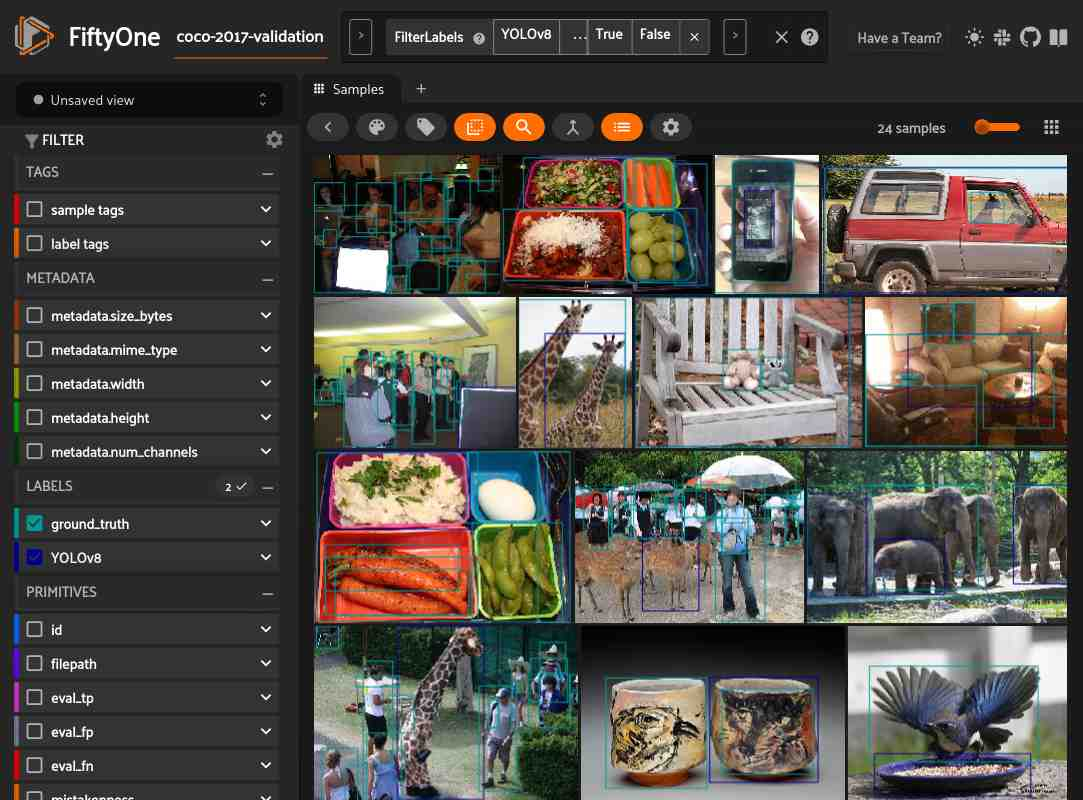

Dataset:          coco-2017-validation
Media type:       image
Num samples:      24
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. FilterLabels(field='YOLOv8', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)

In [82]:
fo.launch_app(dataset.filter_labels('YOLOv8', (F('eval') == 'fp') & (F('confidence') > 0.95)))

## Save and load FiftyOne dataset

In [83]:
fo.list_datasets()

['coco-2017-validation', 'mnist-test', 'quickstart', 'traffic']

In [84]:
dataset.persistent
# dataset.persistent = True

False

In [86]:
fo.load_dataset('coco-2017-validation')

# dataset = fo.load_dataset('traffic').delete()

Name:        coco-2017-validation
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    YOLOv8:            fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:           fiftyone.core.fields.IntField
    eval_fp:           fiftyone.core.fields.IntField
    eval_fn:           fiftyone.core.fields.IntField
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField

In [87]:
dataset.write_json('dataset_coco_yolov8.json')

 100% |███████████████| 5000/5000 [16.0s elapsed, 0s remaining, 343.1 samples/s]      


In [88]:
dataset = fo.Dataset.from_json('dataset_coco_yolov8.json')

 100% |███████████████| 5000/5000 [29.6s elapsed, 0s remaining, 205.3 samples/s]      


## FiftyOne + CVAT

Documentação: https://docs.voxel51.com/tutorials/cvat_annotation.html# e https://docs.voxel51.com/integrations/cvat.html


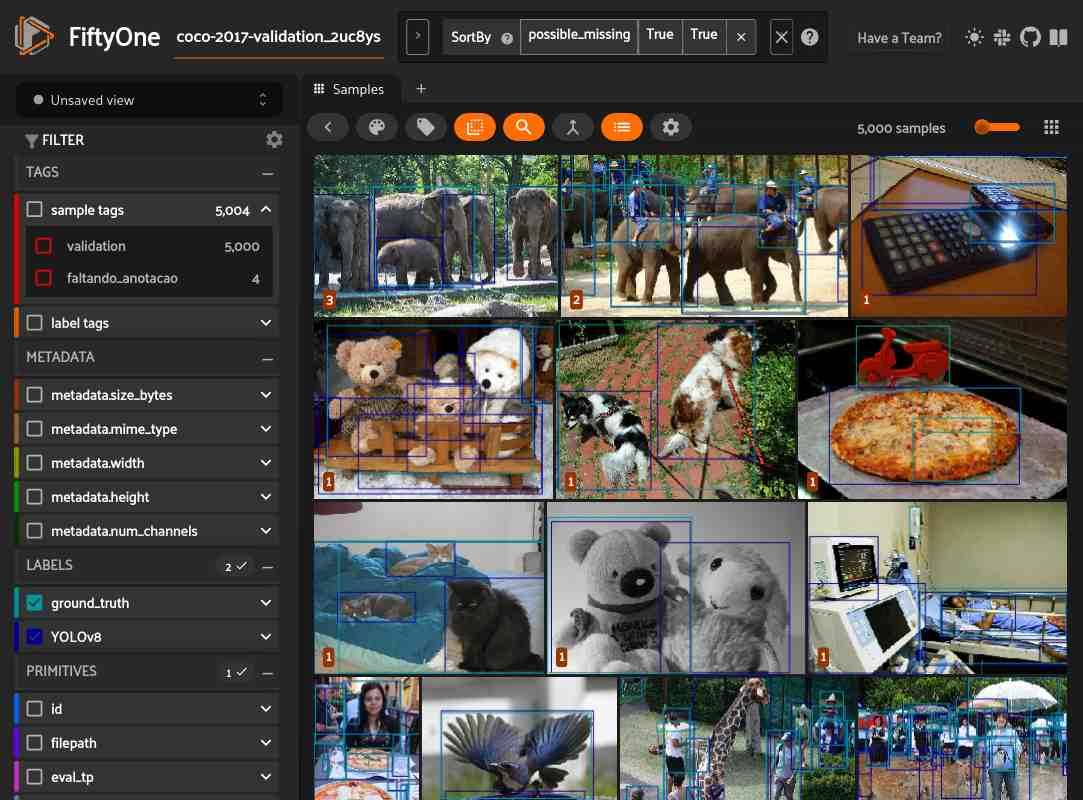

Dataset:          coco-2017-validation_2uc8ys
Media type:       image
Num samples:      5000
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. SortBy(field_or_expr='possible_missing', reverse=True, create_index=True)

In [89]:
fo.launch_app(dataset.sort_by('possible_missing', reverse=True))

In [90]:
to_annotate = dataset.match_tags('faltando_anotacao')
to_annotate

Dataset:     coco-2017-validation_2uc8ys
Media type:  image
Num samples: 4
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    YOLOv8:            fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:           fiftyone.core.fields.IntField
    eval_fp:           fiftyone.core.fields.IntField
    eval_fn:           fiftyone.core.fields.IntField
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField
View stages:
    1. MatchTags(tags=['faltando_anotacao'], bool=True, all=False)

Mais informações: https://docs.voxel51.com/api/fiftyone.core.collections.html#fiftyone.core.collections.SampleCollection.annotate

Se tiver servidor próprio do CVAT (Docker): https://docs.voxel51.com/integrations/cvat.html#cvat-self-hosted-server

In [91]:
anno_results = to_annotate.annotate(
    'fix_annotation',
    label_field='ground_truth',
    label_type='detections',
    classes=dataset.distinct('ground_truth.detections.label'),
    backend='cvat',  # labelstudio or labelbox
    launch_editor=True,
)

Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  programador.artificial@gmail.com
Password:  ········


Uploading samples to CVAT...
Launching editor at 'https://app.cvat.ai/tasks/361149/jobs/393735'...


In [92]:
anno_results.print_status()


Status for label field 'ground_truth':

	Task 361149 (FiftyOne_coco-2017-validation_2uc8ys):
		Status: completed
		Assignee: None
		Last updated: 2023-11-06T14:54:25.439974Z
		URL: https://app.cvat.ai/tasks/361149

		Job 393735:
			Status: completed
			Assignee: None
			Reviewer: None



In [93]:
dataset.load_annotations('fix_annotation', cleanup=True)  # cleanup=True -> delete task

Download complete
Loading labels for field 'ground_truth'...
 100% |█████████████████████| 4/4 [7.2ms elapsed, 0s remaining, 558.5 samples/s] 
Deleting tasks...
 100% |█████████████████████| 1/1 [1.5s elapsed, 0s remaining, 0.7 samples/s] 


In [94]:
fo.launch_app(dataset.match_tags('faltando_anotacao'))

Dataset:          coco-2017-validation_2uc8ys
Media type:       image
Num samples:      4
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. MatchTags(tags=['faltando_anotacao'], bool=True, all=False)

In [95]:
dataset.untag_samples('faltando_anotacao')

## Export annotation

Mais informações: https://docs.voxel51.com/user_guide/export_datasets.html

In [96]:
dataset.export(
    export_dir='my_export',
    dataset_type=fo.types.YOLOv5Dataset(),
    label_field='ground_truth'
)

 100% |███████████████| 5000/5000 [12.0s elapsed, 0s remaining, 458.0 samples/s]      
